[https://www.statsandr.com/blog/chi-square-test-of-independence-in-r/]
Тест Фишера
[https://www.statsandr.com/blog/fisher-s-exact-test-in-r-independence-test-for-a-small-sample/]
Чтобы кратко повторить то, что было сказано в этой статье, критерий независимости хи-квадрат проверяет, существует ли связь между двумя категориальными переменными. Нулевые и альтернативные гипотезы:
##### H0
: переменные независимы, нет никакой связи между двумя категориальными переменными. Знание значения одной переменной не помогает предсказать значение другой переменной
##### H1
: переменные являются зависимыми, существует связь между двумя категориальными переменными. Знание значения одной переменной помогает предсказать значение другой переменной
Критерий независимости хи-квадрат работает путем сравнения наблюдаемых частот (то есть частот, наблюдаемых в вашей выборке) с ожидаемыми частотами, если не было никакой связи между двумя категориальными переменными (таким образом, ожидаемые частоты, если нулевая гипотеза была верной).

In [2]:
suppressWarnings(suppressMessages(library("rvest")))
suppressWarnings(suppressMessages(library("tidyverse")))
suppressWarnings(suppressMessages(library("magrittr")))
suppressWarnings(suppressMessages(library("XML")))
suppressWarnings(suppressMessages(library("dplyr")))
suppressWarnings(suppressMessages(library("lubridate")))
suppressWarnings(suppressMessages(library("dplyr")))
suppressWarnings(suppressMessages(library("plotly")))
suppressWarnings(suppressMessages(library("ggplot2")))

Для нашего примера, давайте повторно используем набор данных, представленный в статье « Описательная статистика в R ». Этот набор данных является хорошо известным iris набором данных, слегка улучшенным. Поскольку существует только одна категориальная переменная, а критерий хи-квадрат требует двух категориальных переменных, мы добавили переменную, size которая соответствует, small если длина лепестка меньше, чем медиана всех цветов, и big противном случае:

In [3]:
dat <- iris
dat$size <- ifelse(dat$Sepal.Length < median(dat$Sepal.Length),  "small", "big")


In [4]:
# Теперь мы создадим таблицу сопряженности двух переменных Speciesи sizeс помощью table()функции:
table(dat$Species, dat$size)

            
             big small
  setosa       1    49
  versicolor  29    21
  virginica   47     3

Таблица сопряженности дает наблюдаемое количество случаев в каждой подгруппе. Например, есть только один большой цветок setosa, в то время как в наборе данных 49 маленьких цветов setosa.
Хорошей практикой также является составление графика для визуального представления данных:

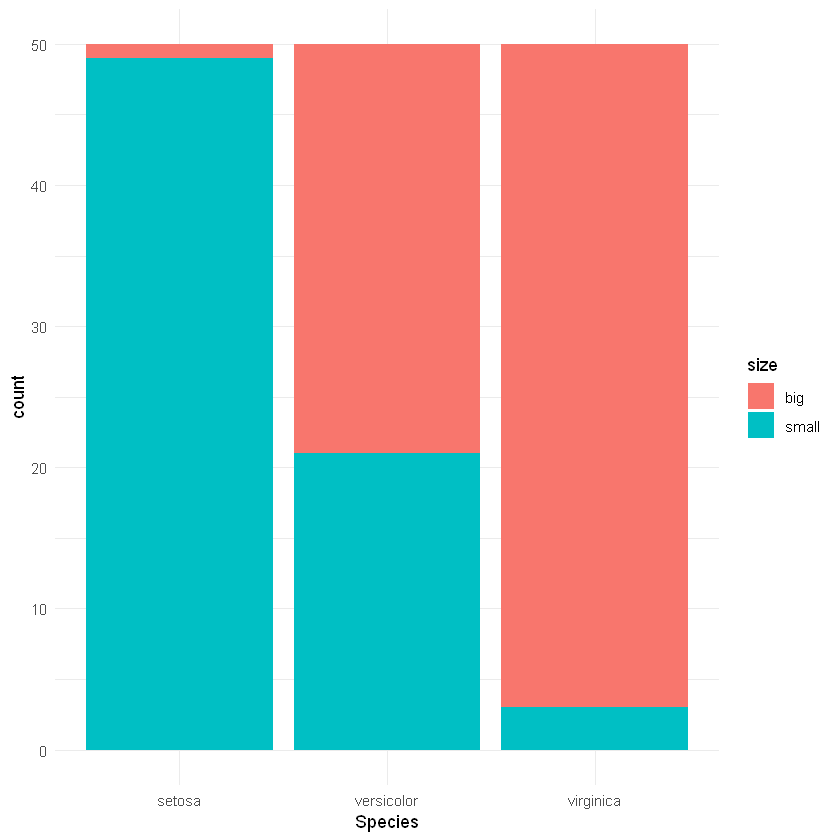

In [5]:
library(ggplot2)

ggplot(dat) +
  aes(x = Species, fill = size) +
  geom_bar() +
  scale_fill_hue() +
  theme_minimal()

In [4]:
# Критерий хи-квадрат независимости в R
# Для этого примера мы собираемся проверить в R, есть ли связь между переменными Speciesи size.
# Для этого используется chisq.test()функция:
test <- chisq.test(table(dat$Species, dat$size))
test


	Pearson's Chi-squared test

data:  table(dat$Species, dat$size)
X-squared = 86.035, df = 2, p-value < 2.2e-16


In [5]:
# Все, что вам нужно, появляется в этом выводе: название теста, какие переменные были использованы,
# статистика теста, степени свободы и p-значение теста.
# Вы также можете получить тестовая статистика и p-значение

test$statistic # test statistic
## X-squared 
##  86.03451
test$p.value # p-value

X-squared 
 86.03451

[1] 2.078944e-19

Вывод и интерпретация
Из вывода и из test$p.valueмы видим, что
p -значение меньше уровня значимости 5%. Как и любой другой статистический тест, если
p-значение меньше уровня значимости, мы можем отвергнуть нулевую гипотезу.
В нашем контексте отклонение нулевой гипотезы для критерия независимости хи-квадрат означает, что существует существенная связь между видом и размером. Следовательно, знание значения одной переменной помогает предсказать значение другой переменной.

Как рассчитать точный критерий Фишера?
Допустим, изучается зависимость частоты рождения детей с врожденными пороками развития (ВПР) от курения матери во время беременности. Для этого выбраны две группы беременных женщин, одна из которых - экспериментальная, состоящая из 80 женщин, куривших в первом триместре беременности, а вторая - группа сравнения, включающая 90 женщин, ведущих здоровый образ жизни на протяжении всей беременности. Число случаев ВПР плода, установленных по данным УЗИ в экспериментальной группе, составило 10, в группе сравнения - 2.

Вначале составляем четырехпольную таблицу сопряженности:

 	Исход есть (Наличие ВПР)	Исхода нет (Отсутствие ВПР)	Всего
Фактор риска есть (Курящие)	A = 10	B = 70	(A + B) = 80
Фактор риска отсутствует (Некурящие)	C = 2	D = 88	(C + D) = 90
Всего	(A + C) = 12	(B + D) = 158	(A + B + C + D) = 170
Точный критерий Фишера рассчитывается по следующей формуле:
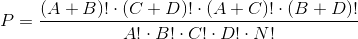

где N - общее число исследуемых в двух группах; ! - факториал, представляющий собой произведение числа на последовательность чисел, каждое из которых меньше предыдущего на 1 (например, 4! = 4 · 3 · 2 · 1)

В результате вычислений находим, что P = 0,0137.

In [27]:
ftest <- fisher.test(mut)
ftest


	Fisher's Exact Test for Count Data

data:  mut
p-value = 0.01747
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.0185731 0.8775718
sample estimates:
odds ratio 
 0.1792683 


Достоинством метода является соответствие полученного критерия точному значению уровня значимости p. То есть, полученное в нашем примере значение 0,0137 и есть уровень значимости различий сравниваемых групп по частоте развития ВПР плода. Необходимо лишь сопоставить данное число с критическим уровнем значимости, обычно принимаемым в медицинских исследованиях за 0,05.

Если значение точного критерия Фишера больше критического, принимается нулевая гипотеза и делается вывод об отсутствии статистически значимых различий частоты исхода в зависимости от наличия фактора риска.
Если значение точного критерия Фишера меньше критического, принимается альтернативная гипотеза и делается вывод о наличии статистически значимых различий частоты исхода в зависимости от воздействия фактора риска.
В нашем примере P < 0,05, в связи с чем делаем вывод о наличии прямой взаимосвязи курения и вероятности развития ВПР плода. Частота возникновения врожденной патологии у детей курящих женщин статистически значимо выше, чем у некурящих.

In [25]:
mut <- matrix(c(80,90,10,2),nrow=2,ncol=2)
mut

80,10
90,2


##### Fisher test
[http://medstatistic.ru/theory/fisher_exact.html]
Например, имеется 205 мутаций в гене р53 из 514 опухолей, в то время как 96 опухолей IV стадии имеют 86 мутаций. Мы ожидаем, что 96 опухолей IV стадии должны иметь 96 х 205/514 = 38 мутаций, в то время как мы наблюдали 86. Значительно ли это отличается от общей мутации?

Как рассчитать точный критерий Фишера?
Допустим, изучается зависимость частоты рождения детей с врожденными пороками развития (ВПР) от курения матери во время беременности. Для этого выбраны две группы беременных женщин, одна из которых - экспериментальная, состоящая из 80 женщин, куривших в первом триместре беременности, а вторая - группа сравнения, включающая 90 женщин, ведущих здоровый образ жизни на протяжении всей беременности. Число случаев ВПР плода, установленных по данным УЗИ в экспериментальной группе, составило 10, в группе сравнения - 2.

Вначале составляем четырехпольную таблицу сопряженности:

 	Исход есть (Наличие ВПР)	Исхода нет (Отсутствие ВПР)	Всего
Фактор риска есть (Курящие)	A = 10	B = 70	(A + B) = 80
Фактор риска отсутствует (Некурящие)	C = 2	D = 88	(C + D) = 90
Всего	(A + C) = 12	(B + D) = 158	(A + B + C + D) = 170
Точный критерий Фишера рассчитывается по следующей формуле:


где N - общее число исследуемых в двух группах; ! - факториал, представляющий собой произведение числа на последовательность чисел, каждое из которых меньше предыдущего на 1 (например, 4! = 4 · 3 · 2 · 1)

В результате вычислений находим, что P = 0,0137.

In [23]:
sam <- matrix(c(86,96,38,96),nrow=2,ncol=2)
sam

86,38
96,96


In [21]:
ftest <- fisher.test(sam)
ftest


	Fisher's Exact Test for Count Data

data:  sam
p-value = 0.0007254
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.372334 3.755052
sample estimates:
odds ratio 
  2.257284 


Чтобы выполнить точный критерий Фишера в R, используйте fisher.test()функцию , аналогичную той, которую вы выполняли бы для критерия хи-квадрат:

test <- fisher.test(dat)
test
Fisher's Exact Test for Count Data 
data:  dat
p-value = 0.02098
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
1.449481      Inf
sample estimates:
odds ratio 
Inf
Наиболее важным на выходе является 
p-значение. Вы также можете получить
p-значение с:

test$p.value
## [1] 0.02097902
Вывод и интерпретация
Из вывода и из test$p.valueмы видим, что
p-значение меньше уровня значимости 5%. Как и любой другой статистический тест, если
p-значение меньше уровня значимости, мы можем отвергнуть нулевую гипотезу.

В нашем контексте отклонение нулевой гипотезы точного критерия независимости Фишера означает, что существует значительная связь между двумя категориальными переменными (привычки курить и быть спортсменом или нет). Следовательно, знание значения одной переменной помогает предсказать значение другой переменной.